In [1]:
import numpy as np
import matplotlib.pyplot as plt

import random
np.random.seed(10)
import seaborn as sns
%load_ext autoreload
%autoreload 2

In [2]:
sns.set_style('whitegrid')

### Daily sentiment measurement

We use the median-absolute deviation (1) to identify the outliers and we then compute the truncated mean ignoring those outliers. 
https://stackoverflow.com/questions/22354094/pythonic-way-of-detecting-outliers-in-one-dimensional-observation-data

In [3]:
def overall_sentiment(data):
    """
    Returns a number from -1.0 to 1.0 representing the overall sentiment.
    It is computed as the mean over the non-outliers.
    """
    outliers_removed = data[is_outlier(data, thresh=2)]
    return np.mean(outliers_removed)

def is_outlier(data, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        data : A numobservations array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    diff = np.abs(data - np.median(data))
    m_dev = np.median(diff)
    modified_z_score = 0.6745 * diff / m_dev if m_dev else 0.
    return modified_z_score > thresh

(1) Iglewicz, Boris, and David Hoaglin. _Volume 16: how to detect and handle outliers, The ASQC basic references in quality control: statistical techniques, Edward F. Mykytka_. Diss. Ph. D., Editor, 1993.

#### Examples

With a normal distribution, transformed to be between -1 and 1

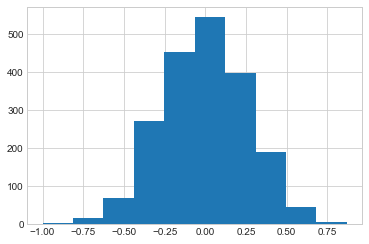

0.032897981536937126

In [4]:
np.random.seed(50)
a=np.random.normal(size=2000)
a=a/max(abs(a))

plt.hist(a)
plt.show()

overall_sentiment(a)

_Happy_ tweets, transformed to be between -1 and 1

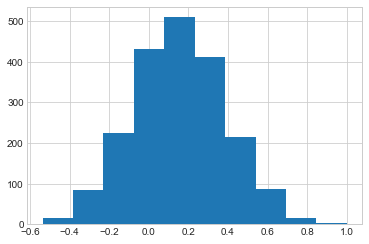

0.15712656656145152

In [5]:
np.random.seed(60)
a=np.random.normal(size=2000)
a+=0.7
a=a/max(abs(a))

plt.hist(a)
plt.show()

overall_sentiment(a)

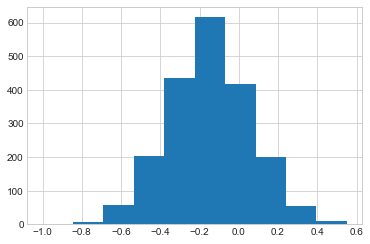

-0.13493921563343231

In [6]:
np.random.seed(26)
a=np.random.normal(size=2000)
a-=0.7
a=a/max(abs(a))

plt.hist(a)
plt.show()

overall_sentiment(a)

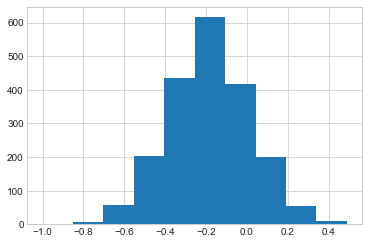

-0.16933682853553783

In [7]:
np.random.seed(26)
a=np.random.normal(loc=-0.9, size=2000)
a=a/max(abs(a))

plt.hist(a)
plt.show()

overall_sentiment(a)

### Sentimental impact estimation

In [32]:
from sentiment_impact import measure_impact
import numpy as np

#### Basic examples

In [38]:
ex0 = np.array([.01,-.03,-.04,.5,.6,.8,.82])
# We define ex1 as -ex0
ex1 = - ex0
# We define ex3 as 
ex3 = ex0.copy()
ex3[[4,5]] += [.2, -.2]

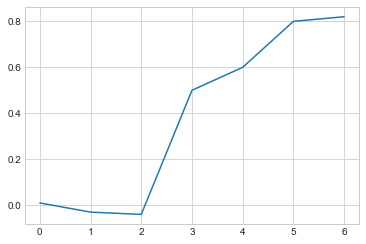

0.135


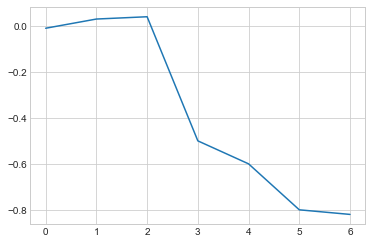

0.135


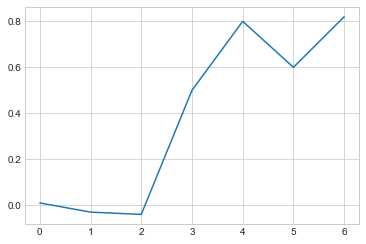

0.135


In [39]:
plt.plot(range(len(ex0)), ex0)
plt.show()
print(measure_impact(ex0))

plt.plot(range(len(ex1)), ex1)
plt.show()
print(measure_impact(ex1))

plt.plot(range(len(ex3)), ex3)
plt.show()
print(measure_impact(ex3))

#### Complex cases

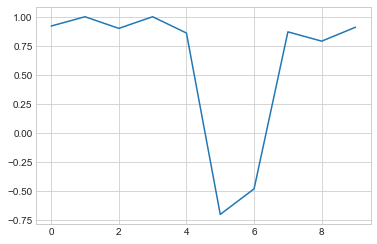

0.73499999999999988

In [35]:
ex4 = np.array([ 0.92, 1.0, 0.90, 1.0, 0.86,
       -0.70, -0.48, 0.87, 0.79,  0.91])

plt.plot(range(len(ex4)),ex4)
plt.show()

measure_impact(ex4)

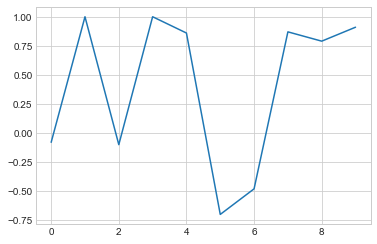

0.25499999999999989

In [40]:
ex5 = ex4.copy()
ex5[[0,2]] -= 1
ex5 = np.clip(ex5, -1,1)
plt.plot(range(10),ex5)
plt.show()
max(ex5)
min(ex5)
measure_impact(ex5)

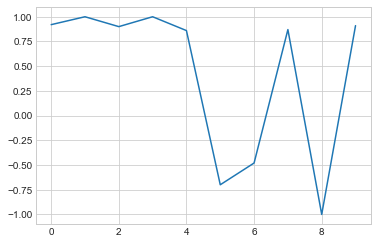

0.88500000000000001

In [41]:
ex6 = ex4.copy()
ex6[8] -= 2
ex6 = np.clip(ex6, -1,1)
plt.plot(range(10),ex6)
plt.show()
max(ex6)
min(ex6)
measure_impact(ex6)

#### Other stuff

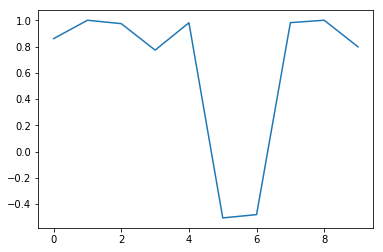

In [16]:
N = 10 # sample count
P = 5  # period
D = 2   # width of pulse
np.random.seed(10)
sig = 1.5*(.5-(np.arange(N) % P < D))
sig += np.array([random.uniform(0,.3) for p in range(10)])
extra = np.zeros(10)
extra[0] = 1.5
extra[1] = 1.54
sig+=extra
sig = np.clip(sig, -1,1)
plt.plot(range(10),sig)
plt.show()

In [17]:
measure_impact(sig)

0.537439126362
0.0719300497045


0.46550907665704816

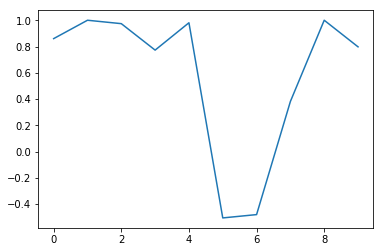

0.537439126362
0.0719300497045


0.46550907665704816

In [18]:
extra = np.zeros(10)
extra[0] = 0
extra[1] = 1.54
extra[7] = -.6
sig3 = sig+extra
sig3 = np.clip(sig3, -1,1)
plt.plot(range(10),sig3)
plt.show()
max(sig3)
min(sig3)
measure_impact(sig3)

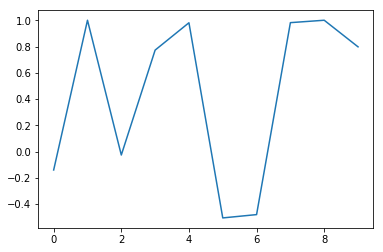

0.537439126362
0.39657857581


0.14086055055111424

In [19]:
extra = np.zeros(10)
extra[0] = -1
extra[2] = -1
sig2 = sig+extra
sig2 = np.clip(sig2, -1,1)
plt.plot(range(10),sig2)
plt.show()
max(sig2)
min(sig2)
measure_impact(sig2)

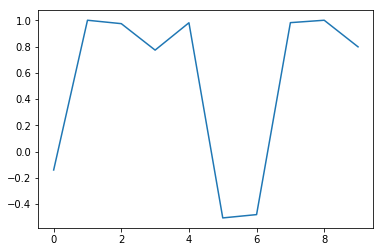

0.537439126362
0.196930049705


0.34050907665704816

In [20]:
extra = np.zeros(10)
extra[0] = -1
sig2 = sig+extra
sig2 = np.clip(sig2, -1,1)
plt.plot(range(10),sig2)
plt.show()
max(sig2)
min(sig2)
measure_impact(sig2)

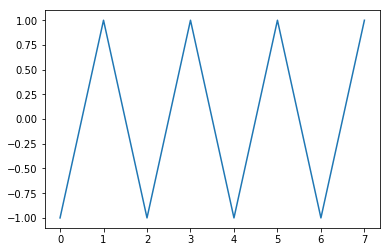

0.769230769231
1.0


0

In [43]:
example1 = np.array([-1,1,-1,1,-1,1,-1,1])
plt.plot(range(len(example1)), example1)
plt.show()

measure_impact(example1)

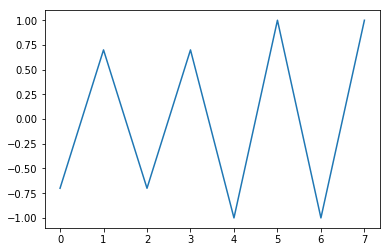

0.769230769231
0.7


0.069230769230769318

In [44]:
example1 = np.array([-.7,.7,-.7,.7,-1,1,-1,1])
plt.plot(range(len(example1)), example1)
plt.show()

measure_impact(example1)

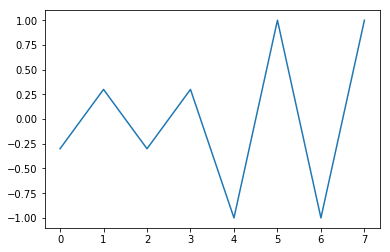

0.769230769231
0.3


0.46923076923076917

In [45]:
example1 = np.array([-.3,.3,-.3,.3,-1,1,-1,1])
plt.plot(range(len(example1)), example1)
plt.show()

measure_impact(example1)

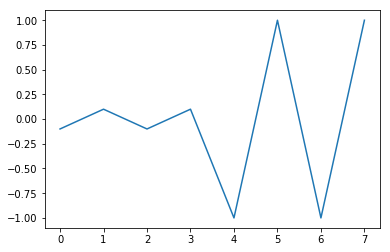

0.769230769231
0.1


0.66923076923076918

In [48]:
example1 = np.array([-.1,.1,-.1,.1,-1,1,-1,1])
plt.plot(range(len(example1)), example1)
plt.show()

measure_impact(example1)

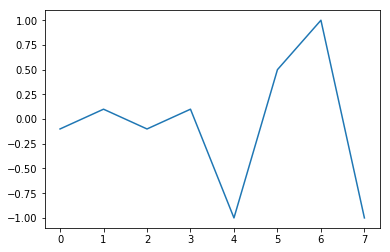

0.769230769231
0.1


0.66923076923076918

In [49]:
example1 = np.array([-.1,.1,-.1,.1,-1,.5,1,-1])
plt.plot(range(len(example1)), example1)
plt.show()

measure_impact(example1)

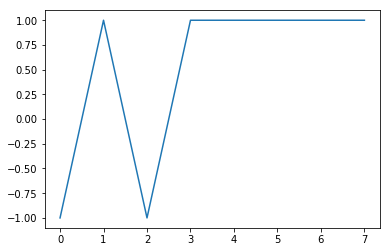

0.0
1.0


0

In [41]:
example1 = np.array([-1,1,-1,1,1,1,1,1])
plt.plot(range(len(example1)), example1)
plt.show()

measure_impact(example1)

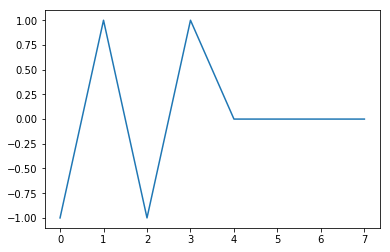

0.384615384615
1.0


0

In [42]:
example1 = np.array([-1,1,-1,1,0,0,0,0])
plt.plot(range(len(example1)), example1)
plt.show()

measure_impact(example1)

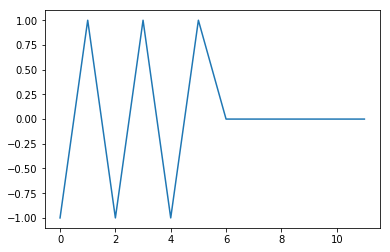

0.333333333333
1.0


0

In [39]:
example1 = np.array([-1,1,-1,1,-1,1,0,0,0,0,0,0])
plt.plot(range(len(example1)), example1)
plt.show()

measure_impact(example1)

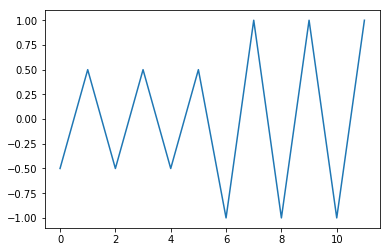

0.666666666667
0.5


0.16666666666666663

In [34]:
example1 = np.array([-.5,.5,-.5,.5,-.5,.5,-1,1,-1,1,-1,1])
plt.plot(range(len(example1)), example1)
plt.show()

measure_impact(example1)

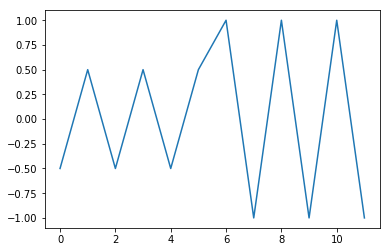

0.666666666667
0.5


0.16666666666666663

In [38]:
example1 = np.array([-.5,.5,-.5,.5,-.5,.5,1,-1,1,-1,1,-1])
plt.plot(range(len(example1)), example1)
plt.show()

measure_impact(example1)